<a href="https://colab.research.google.com/github/MennatullahSamir/Carerha-/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Consumption Analysis

**Introduction**

This notebook explores energy consumption patterns using datasets containing energy usage data for different sites and power demand information. It aims to understand how energy consumption varies across regions, time of day, and other factors. The analysis involves data cleaning, transformation, feature engineering, and visualization techniques to extract insights and trends. Additionally, statistical hypothesis testing is employed to investigate potential relationships between variables such as region and energy consumption. The findings from this analysis can be valuable for energy management, resource allocation, and policy development.

## Data Exploration and Analysis


In [ ]:
#import needed libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Sites Energy Consumption

---



In [ ]:
#Data connection
folder_Path = '/content/drive/MyDrive/Carerha - Data_Science -Track/Data/Final Project'
dfs = []

for filename in os.listdir(folder_Path):
  if filename.startswith('Sites Energy Consumption') and filename.endswith('.csv'):
    file_path = folder_Path + '/' + filename
    df = pd.read_csv(file_path)
    dfs.append(df)

energy_consumption = pd.concat(dfs,ignore_index= True)





In [ ]:
#Data cleaning and transformation

#Check null values (missing values)
print(f"null values count = {energy_consumption.isnull().sum()}") #Dataframe does not have null values

#Check duplicates
energy_consumption.duplicated().sum()
energy_consumption.drop_duplicates(inplace=True)

#Check same categoories different spelling mistakes (inconsistencies)
energy_consumption['region'].unique()
energy_consumption['site_id'].unique()

#Check coulmns types
energy_consumption['DateTime'] = pd.to_datetime( energy_consumption['DateTime'], format='mixed', dayfirst=True)



energy_consumption.info()
energy_consumption



null values count = cell_id                    0
DateTime                   0
KWH/hh (per half hour)     0
site_id                    0
region                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1379310 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   cell_id                  1379310 non-null  object        
 1   DateTime                 1379310 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   1379310 non-null  float64       
 3   site_id                  1379310 non-null  object        
 4   region                   1379310 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 63.1+ MB


,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2024-01-13 00:00:00,0.219,A,A
1,MAC000002,2024-01-13 00:30:00,0.241,A,A
2,MAC000002,2024-01-13 01:00:00,0.191,A,A
3,MAC000002,2024-01-13 01:30:00,0.235,A,A
4,MAC000002,2024-01-13 02:00:00,0.182,A,A
...,...,...,...,...,...
1380247,MAC000069,2024-05-13 20:00:00,0.061,G,C
1380248,MAC000069,2024-05-13 20:30:00,0.090,G,C
1380249,MAC000069,2024-05-13 21:00:00,0.069,G,C
1380250,MAC000069,2024-05-13 21:30:00,0.084,G,C


In [ ]:
#feature engineering
energy_consumption['hour'] = energy_consumption['DateTime'].dt.hour
energy_consumption['day'] = energy_consumption['DateTime'].dt.day.astype(str)
energy_consumption['month'] = energy_consumption['DateTime'].dt.month.astype(str)
energy_consumption['year'] = energy_consumption['DateTime'].dt.year.astype(str)

# Create time of day categories based on hour of the day
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'



energy_consumption['time_of_day'] = energy_consumption['hour'].apply(get_time_of_day)
energy_consumption['hour'] = energy_consumption['DateTime'].dt.hour.astype(str)

energy_consumption

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,hour,day,month,year,time_of_day
0,MAC000002,2024-01-13 00:00:00,0.219,A,A,0,13,1,2024,Night
1,MAC000002,2024-01-13 00:30:00,0.241,A,A,0,13,1,2024,Night
2,MAC000002,2024-01-13 01:00:00,0.191,A,A,1,13,1,2024,Night
3,MAC000002,2024-01-13 01:30:00,0.235,A,A,1,13,1,2024,Night
4,MAC000002,2024-01-13 02:00:00,0.182,A,A,2,13,1,2024,Night
...,...,...,...,...,...,...,...,...,...,...
1380247,MAC000069,2024-05-13 20:00:00,0.061,G,C,20,13,5,2024,Evening
1380248,MAC000069,2024-05-13 20:30:00,0.090,G,C,20,13,5,2024,Evening
1380249,MAC000069,2024-05-13 21:00:00,0.069,G,C,21,13,5,2024,Evening
1380250,MAC000069,2024-05-13 21:30:00,0.084,G,C,21,13,5,2024,Evening


## vizualization

        KWH/hh (per half hour) 
region                         
A                 154498.198004
B                  85519.611995
C                  87708.196993
D                   6528.834000


<BarContainer object of 4 artists>

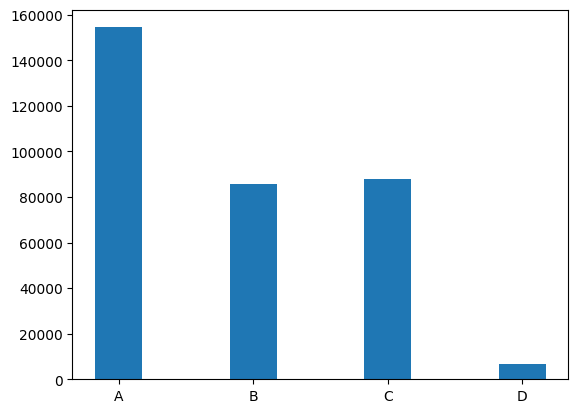

In [ ]:
# Data Analysis
pvt_table = pd.pivot_table(data = energy_consumption, index = 'region', values = 'KWH/hh (per half hour) ', aggfunc = 'sum')
print(pvt_table)

# Data Viz
plt.bar(pvt_table.index, pvt_table['KWH/hh (per half hour) '], width = 0.35)

       KWH/hh (per half hour) 
month                         
1                 45130.702996
10                24799.507998
11                26995.298000
12                29813.574996
2                 31773.985000
3                 34173.739996
4                 27371.803004
5                 27036.735999
6                 22595.661998
7                 21562.236004
8                 21101.585003
9                 21900.009995


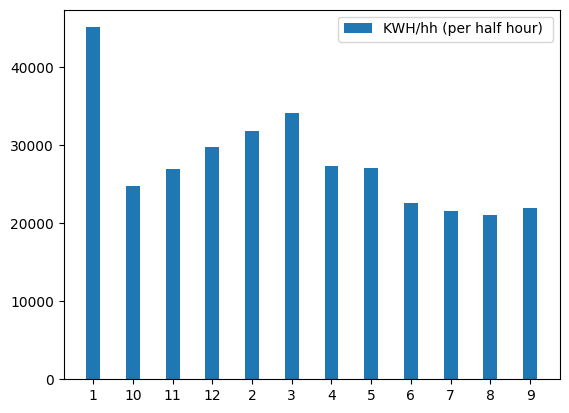

In [ ]:
# Data Analysis
pvt_table = pd.pivot_table(data = energy_consumption, index = 'month', values = ['KWH/hh (per half hour) '], aggfunc = 'sum')
print(pvt_table)

# Info
bw = 0.35
x = pvt_table.index
y = pvt_table['KWH/hh (per half hour) ']



# Data Viz
plt.bar(x, y, width = bw, label = 'KWH/hh (per half hour) ')

plt.legend()

### Power Demand

In [ ]:
#Data connection
file_path = '/content/drive/MyDrive/Carerha - Data_Science -Track/Data/Final Project/Demand.xlsx'
power_demand = pd.read_excel(file_path)

#Data cleaning & Transformation
power_demand.isnull().sum() #there is no missing values
power_demand.duplicated().sum() # there is no duplicates
power_demand['DemandDateTime'] = pd.to_datetime(power_demand['DemandDateTime'],format='mixed', dayfirst=True)

# Map Demand categories to prices (High, Normal, Low)
price_map = {'High': 77.21, 'Normal': 19.46, 'Low': 6.89}
power_demand['DemandPrice'] = power_demand['Demand'].map(price_map)
power_demand

,DemandDateTime,Demand,DemandPrice
0,2013-01-01 00:00:00,Normal,19.46
1,2013-01-01 00:30:00,Normal,19.46
2,2013-01-01 01:00:00,Normal,19.46
3,2013-01-01 01:30:00,Normal,19.46
4,2013-01-01 02:00:00,Normal,19.46
...,...,...,...
17515,2013-12-31 21:30:00,Normal,19.46
17516,2013-12-31 22:00:00,Normal,19.46
17517,2013-12-31 22:30:00,Normal,19.46
17518,2013-12-31 23:00:00,Normal,19.46


<ipython-input-59-4c249206d893>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=energy_consumption,x='region',y='KWH/hh (per half hour) ' ,ci=None, palette='viridis')
<ipython-input-59-4c249206d893>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=energy_consumption,x='region',y='KWH/hh (per half hour) ' ,ci=None, palette='viridis')


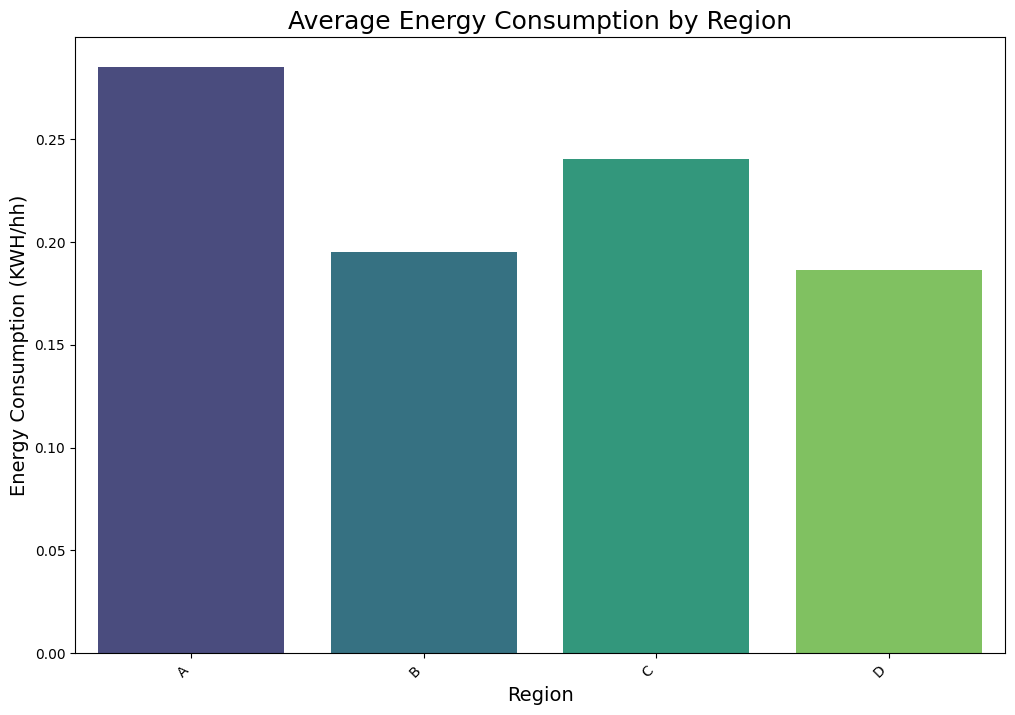

In [ ]:
# Average Energy Consumption by Region barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=energy_consumption,x='region',y='KWH/hh (per half hour) ' ,ci=None, palette='viridis')
plt.title('Average Energy Consumption by Region', fontsize=18)
plt.ylabel('Energy Consumption (KWH/hh)', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate region labels for better readability
plt.show()

<ipython-input-63-354f8318d600>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=energy_consumption, x='time_of_day', y='KWH/hh (per half hour) ', palette='Set2')


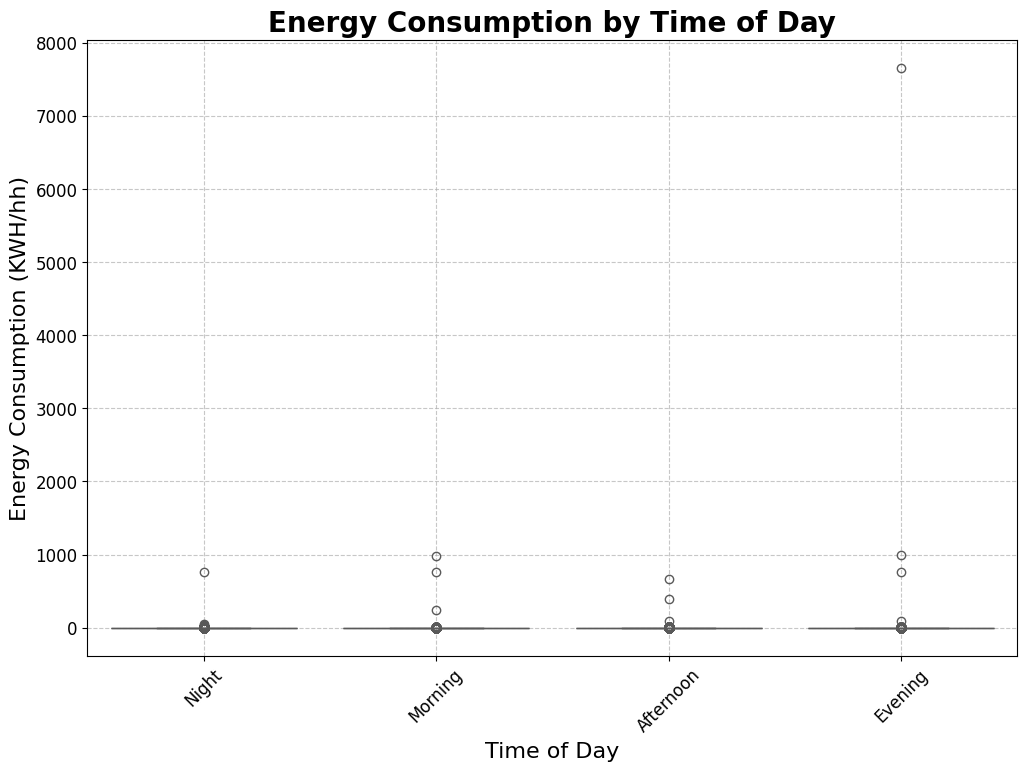

In [ ]:
# Energy Consumption by Time of Day boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=energy_consumption, x='time_of_day', y='KWH/hh (per half hour) ', palette='Set2')
plt.title('Energy Consumption by Time of Day', fontsize=20, fontweight='bold')
plt.xlabel('Time of Day', fontsize=16)
plt.ylabel('Energy Consumption (KWH/hh)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

### Statistical Hypothesis Testing

In [ ]:
#Anova test
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

pg.anova(data = energy_consumption, dv = 'KWH/hh (per half hour) ', between = 'region', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,region,2.086303e+03,3,695.434354,15.183894,7.065856e-10,0.000033
1,Within,6.317330e+07,1379306,45.800790,NaN,NaN,NaN
